## Cars Data Regression Analysis
Predicting price of cars 

### Loading Libraries


In [ ]:
#pip install auto-sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.4 MB 8.0 MB/s 
     |████████████████████████████████| 22.3 MB 1.4 MB/s 
     |████████████████████████████████| 1.1 MB 43.0 MB/s 
     |████████████████████████████████| 837 kB 23.0 MB/s 
     |████████████████████████████████| 4.3 MB 15.8 MB/s 
     |████████████████████████████████| 4.4 MB 49.7 MB/s 
     |████████████████████████████████| 260 kB 72.2 MB/s 
     |████████████████████████████████| 596 kB 61.1 MB/s 
     |████████████████████████████████| 141 kB 57.0 MB/s 
     |████████████████████████████████| 46 kB 4.1 MB/s 
  Created wheel for auto-sklearn: filename=auto_sklearn-0.14.7-py3-none-any.whl size=6602873 sha256=911e50b0c2649e14ce65362e89d347649bc3919d6a2d72a50325be5485170967
  Stored in directory: /root/.cache/pip/wheels/ba/43/5c/2fbe6fd19e3af314cbc4aa808378068d8ddd6792064f4a2448
  Created wheel for pynisher: filename=pynisher-0.6.

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from plotnine import * 
import seaborn as sns


### Loading the Cars Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cars.csv to cars (1).csv


In [ ]:
# Reading the Cars Dataset
cars = pd.read_csv('cars.csv')

### Descriptive Analytics


In [ ]:
# first five rows
cars.head()

,price,age,km,fuel_type,hp,metallic_color,color,automatic,cc,doors,tax,weight
0,13500,23,46986,Diesel,90,1,Blue,0,2000,3,210,1165
1,13750,23,72937,Diesel,90,1,Silver,0,2000,3,210,1165
2,13950,24,41711,Diesel,90,1,Blue,0,2000,3,210,1165
3,14950,26,48000,Diesel,90,0,Black,0,2000,3,210,1165
4,13750,30,38500,Diesel,90,0,Black,0,2000,3,210,1170


In [ ]:
# Doors Distribution
cars.doors.value_counts()

5    674
3    622
4    138
2      2
Name: doors, dtype: int64

In [ ]:
# Removing 2 door cars 
cars = cars.query('doors > 2')

In [ ]:
# Doors Distribution
cars.doors.value_counts()

5    674
3    622
4    138
Name: doors, dtype: int64

In [ ]:
# Doors Distribution
cars.doors.value_counts()

5    674
3    622
4    138
Name: doors, dtype: int64

In [ ]:
# last few rows
cars.tail()

,price,age,km,fuel_type,hp,metallic_color,color,automatic,cc,doors,tax,weight
1431,7500,69,20544,Petrol,86,1,Blue,0,1300,3,69,1025
1432,10845,72,19000,Petrol,86,0,Grey,0,1300,3,69,1015
1433,8500,71,17016,Petrol,86,0,Blue,0,1300,3,69,1015
1434,7250,70,16916,Petrol,86,1,Grey,0,1300,3,69,1015
1435,6950,76,1,Petrol,110,0,Green,0,1600,5,19,1114


In [ ]:
# dataset infor
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1434 entries, 0 to 1435
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   price           1434 non-null   int64 
 1   age             1434 non-null   int64 
 2   km              1434 non-null   int64 
 3   fuel_type       1434 non-null   object
 4   hp              1434 non-null   int64 
 5   metallic_color  1434 non-null   int64 
 6   color           1434 non-null   object
 7   automatic       1434 non-null   int64 
 8   cc              1434 non-null   int64 
 9   doors           1434 non-null   int64 
 10  tax             1434 non-null   int64 
 11  weight          1434 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 145.6+ KB


In [ ]:
# Unique Values
cars.nunique()

price              236
age                 77
km                1262
fuel_type            3
hp                  11
metallic_color       2
color               10
automatic            2
cc                  13
doors                3
tax                 13
weight              59
dtype: int64

In [ ]:
# changing to categorical
cars.metallic_color = cars.metallic_color.astype('category')

In [ ]:
# Car info
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1434 entries, 0 to 1435
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   price           1434 non-null   int64   
 1   age             1434 non-null   int64   
 2   km              1434 non-null   int64   
 3   fuel_type       1434 non-null   object  
 4   hp              1434 non-null   int64   
 5   metallic_color  1434 non-null   category
 6   color           1434 non-null   object  
 7   automatic       1434 non-null   int64   
 8   cc              1434 non-null   int64   
 9   doors           1434 non-null   int64   
 10  tax             1434 non-null   int64   
 11  weight          1434 non-null   int64   
dtypes: category(1), int64(9), object(2)
memory usage: 136.0+ KB


In [ ]:
# changing to categorical
cars.automatic = cars.automatic.astype('category')

In [ ]:
# changing to categorical
cars.doors = cars.doors.astype('category')

In [ ]:
# changing to categorical
cars.cc = cars.cc.astype('category')


In [ ]:
# Car info
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1434 entries, 0 to 1435
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   price           1434 non-null   int64   
 1   age             1434 non-null   int64   
 2   km              1434 non-null   int64   
 3   fuel_type       1434 non-null   object  
 4   hp              1434 non-null   int64   
 5   metallic_color  1434 non-null   category
 6   color           1434 non-null   object  
 7   automatic       1434 non-null   category
 8   cc              1434 non-null   category
 9   doors           1434 non-null   category
 10  tax             1434 non-null   int64   
 11  weight          1434 non-null   int64   
dtypes: category(4), int64(6), object(2)
memory usage: 107.4+ KB


## Graphical Summaries

/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 46'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)


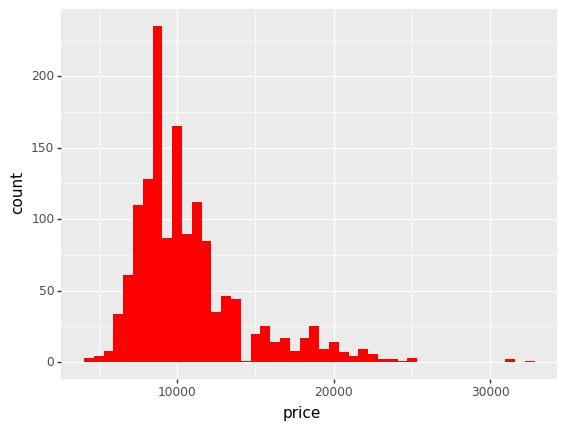

<ggplot: (8790612131873)>

In [ ]:
# Price histogram
ggplot(cars, aes(x = 'price')) + geom_histogram(fill = 'red')

/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 18'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)


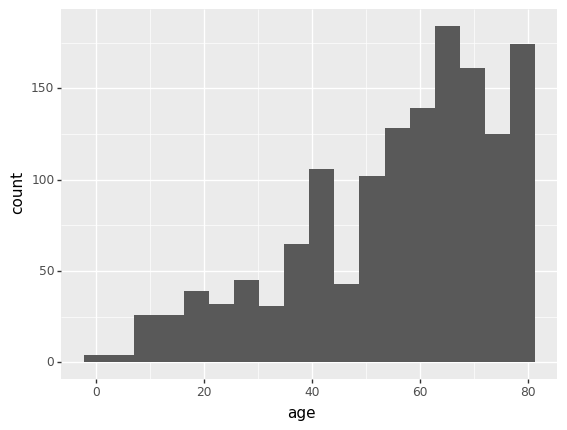

<ggplot: (8790609142125)>

In [ ]:
# Price histogram
ggplot(cars, aes(x = 'age')) + geom_histogram()

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 6'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)


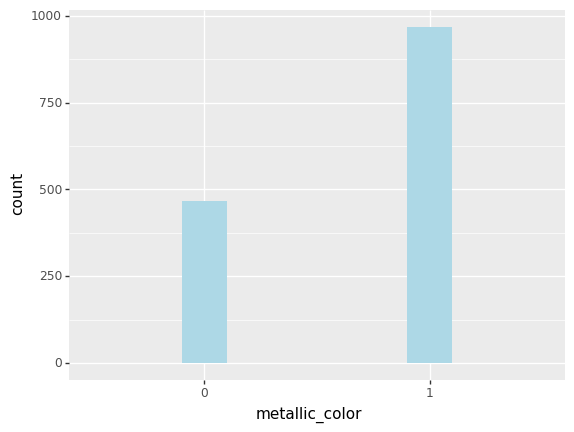

<ggplot: (8790609148085)>

In [ ]:
# Price histogram
ggplot(cars, aes(x = 'metallic_color')) + geom_histogram(fill = 'lightblue')

/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 78'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)


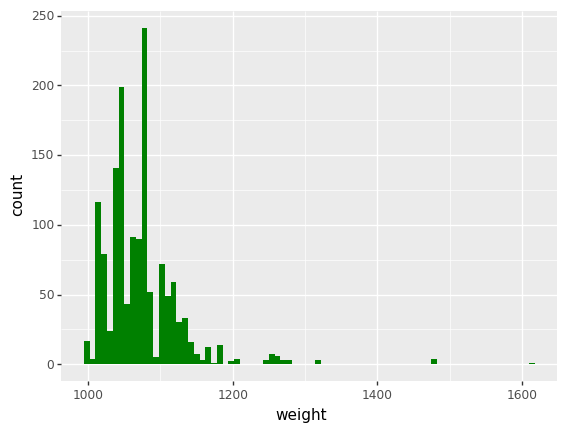

<ggplot: (8790609118861)>

In [ ]:
# Price histogram
ggplot(cars, aes(x = 'weight')) + geom_histogram(fill = 'green')

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 6'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)


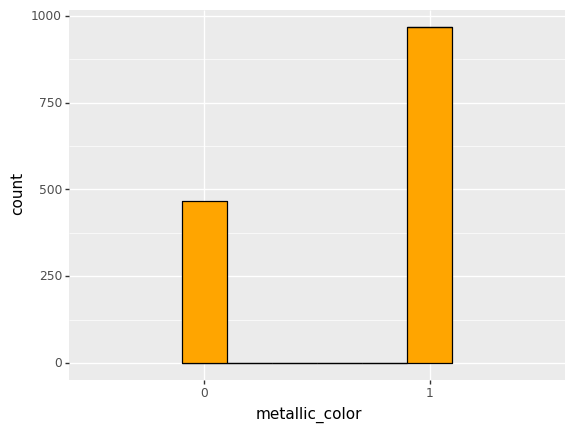

<ggplot: (8790609142245)>

In [ ]:
# Price histogram
ggplot(cars, aes(x = 'metallic_color')) + geom_histogram(fill = 'orange', color = 'black')

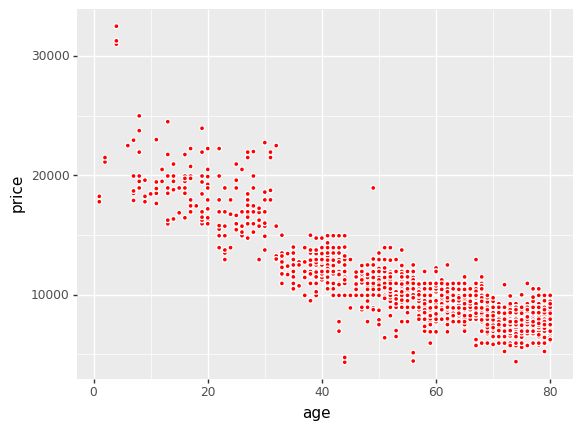

<ggplot: (8790609111433)>

In [ ]:
# Scatterplot price vs age
ggplot(cars, aes(x = 'age', y = 'price')) + geom_point(fill = 'red', color = 'white')

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


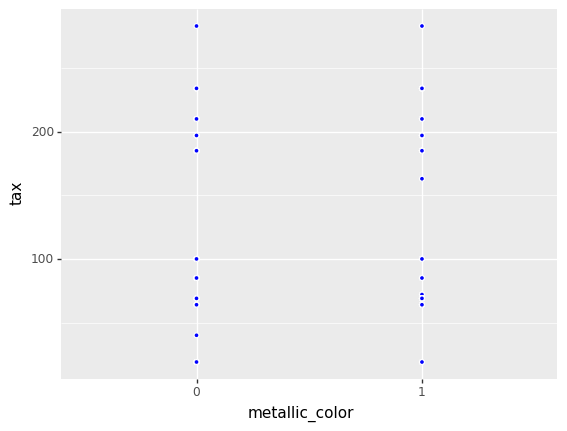

<ggplot: (8790609098841)>

In [ ]:
# Scatterplot metallic_color vs tax
ggplot(cars, aes(x = 'metallic_color', y = 'tax')) + geom_point(fill = 'blue', color = 'white')

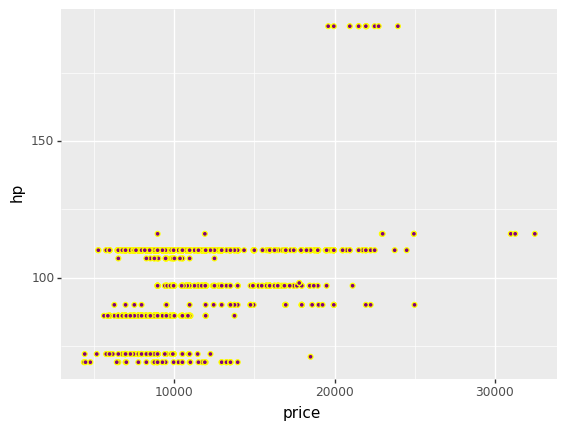

<ggplot: (8790609098761)>

In [ ]:
# Scatterplot metallic_color vs tax
ggplot(cars, aes(x = 'price', y = 'hp')) + geom_point(fill = 'purple', color = 'yellow')

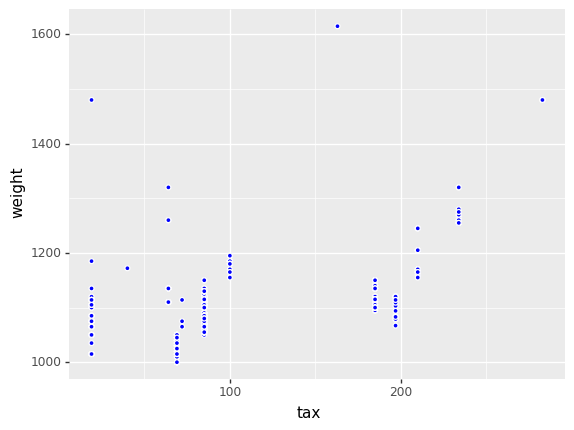

<ggplot: (8790607448013)>

In [ ]:
# Scatterplot metallic_color vs tax
ggplot(cars, aes(x = 'tax', y = 'weight')) + geom_point(fill = 'blue', color = 'white')

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


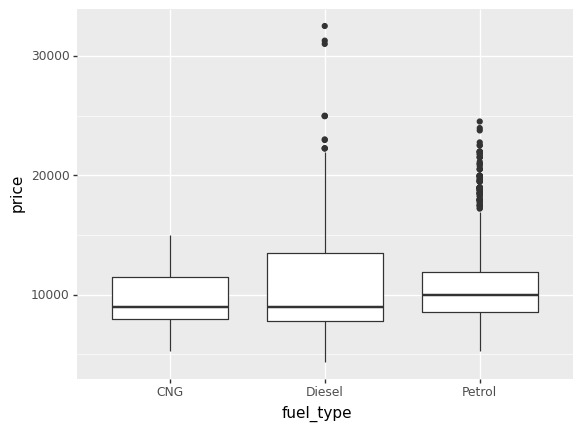

<ggplot: (8790609109561)>

In [ ]:
# boxplot price vs fuel_type
ggplot(cars, aes(x = 'fuel_type', y = 'price')) + geom_boxplot()

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


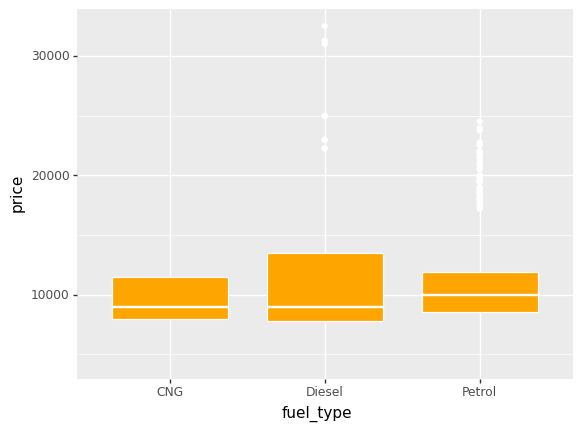

<ggplot: (8790607387205)>

In [ ]:
# boxplot price vs fuel_type
ggplot(cars, aes(x = 'fuel_type', y = 'price')) + geom_boxplot(fill = 'orange', color = 'white')

/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


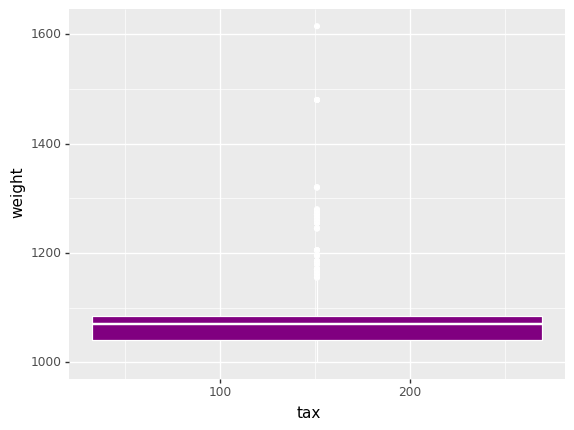

<ggplot: (8790607447933)>

In [ ]:
# boxplot price vs fuel_type
ggplot(cars, aes(x = 'tax', y = 'weight')) + geom_boxplot(fill = 'purple', color = 'white')

/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


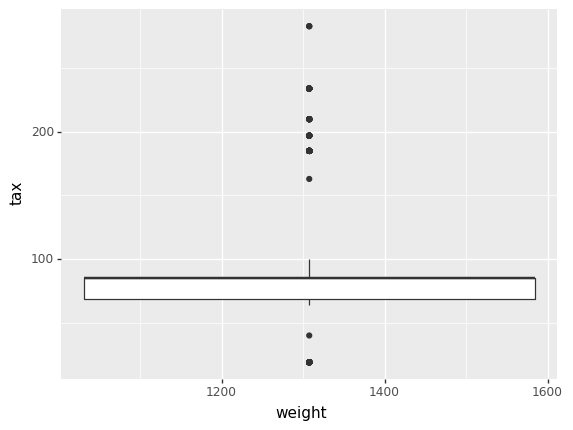

<ggplot: (8790607416445)>

In [ ]:
# boxplot tax vs weight
ggplot(cars, aes(x = 'weight', y = 'tax', fill = 'weight')) + geom_boxplot()

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


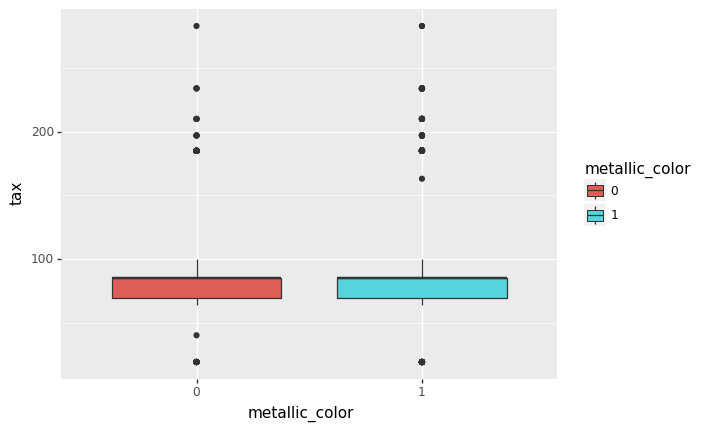

<ggplot: (8790609098925)>

In [ ]:
# boxplot tax vs metallic_color
ggplot(cars, aes(x = 'metallic_color', y = 'tax', fill = 'metallic_color')) + geom_boxplot()

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


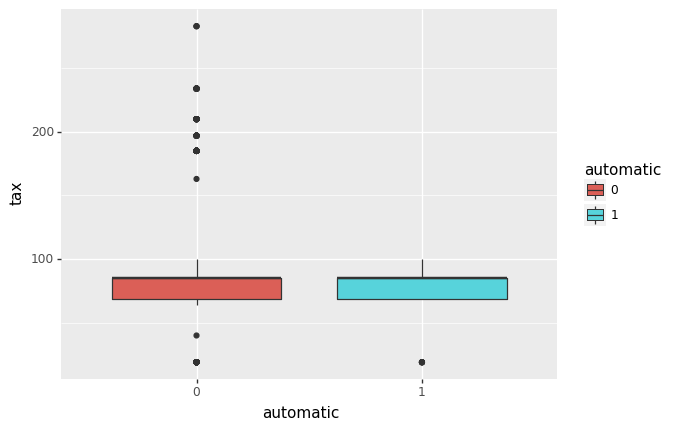

<ggplot: (8790612143357)>

In [ ]:
# boxplot tax vs automatic
ggplot(cars, aes(x = 'automatic', y = 'tax', fill = 'automatic')) + geom_boxplot()

/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


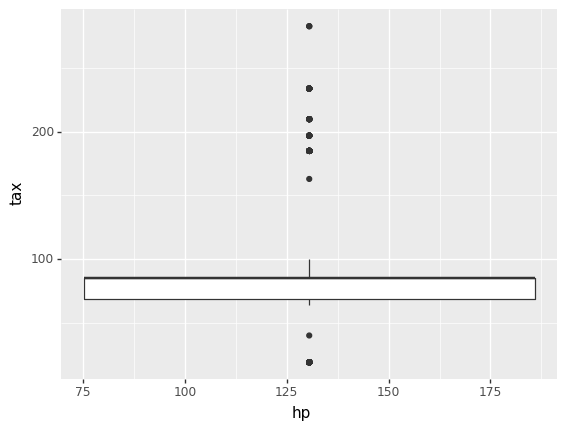

<ggplot: (8790607140173)>

In [ ]:
# boxplot tax vs hp
ggplot(cars, aes(x = 'hp', y = 'tax', fill = 'hp')) + geom_boxplot()

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


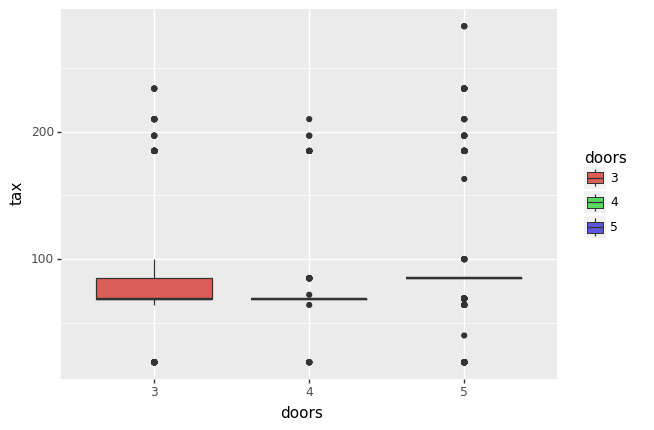

<ggplot: (8790607126657)>

In [ ]:
# boxplot tax vs doors
ggplot(cars, aes(x = 'doors', y = 'tax', fill = 'doors')) + geom_boxplot()

In [ ]:
# correlation matrix
cars.corr()

,price,age,km,hp,tax,weight
price,1.000000,-0.876521,-0.569740,0.314108,0.220407,0.581697
age,-0.876521,1.000000,0.505304,-0.155499,-0.199860,-0.470788
km,-0.569740,0.505304,1.000000,-0.331782,0.276556,-0.029482
hp,0.314108,-0.155499,-0.331782,1.000000,-0.297830,0.090103
tax,0.220407,-0.199860,0.276556,-0.297830,1.000000,0.625771
weight,0.581697,-0.470788,-0.029482,0.090103,0.625771,1.000000


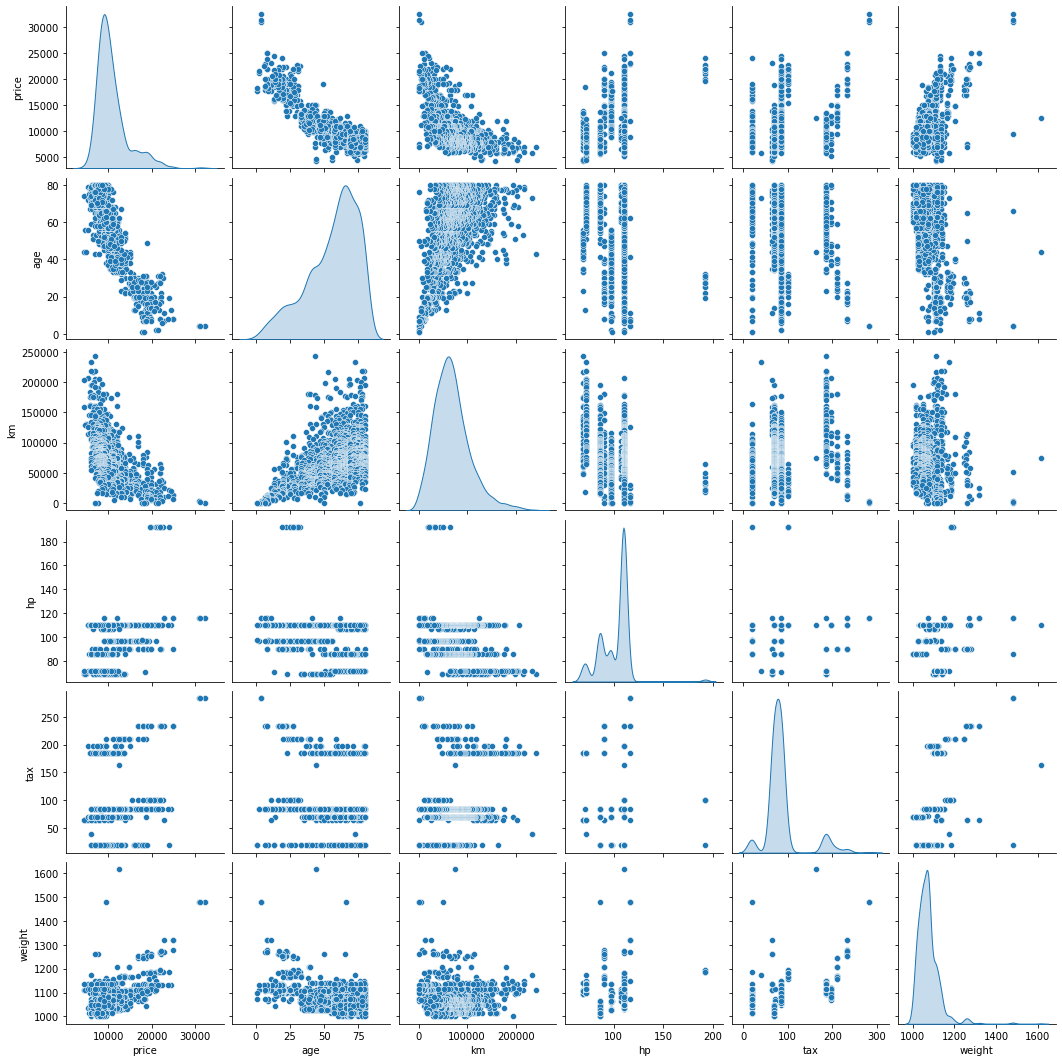

In [ ]:
# scatterplot matrix
sns.pairplot(cars, diag_kind= 'kde')

## Predictive analysis: Choosing predictors


In [ ]:
# choosing predictors
predictors = ['age', 'km', 'weight', 'fuel_type', 'metallic_color', 'doors']

In [ ]:
# Target variable
target = 'price'

In [ ]:
# creating dummy variables
X = pd.get_dummies(cars[predictors], drop_first= True)
X.head()

,age,km,weight,fuel_type_Diesel,fuel_type_Petrol,metallic_color_1,doors_4,doors_5
0,23,46986,1165,1,0,1,0,0
1,23,72937,1165,1,0,1,0,0
2,24,41711,1165,1,0,1,0,0
3,26,48000,1165,1,0,0,0,0
4,30,38500,1170,1,0,0,0,0


In [ ]:
# Target variable 
y = cars[target]
y[0:5]


0    13500
1    13750
2    13950
3    14950
4    13750
Name: price, dtype: int64

In [ ]:
# Target variable 
y = cars[target]
y[0:4]


0    13500
1    13750
2    13950
3    14950
Name: price, dtype: int64

In [ ]:
# Target variable 
y = cars[target]
y[0:3]


0    13500
1    13750
2    13950
Name: price, dtype: int64

In [ ]:
# Target variable 
y = cars[target]
y[0:2]


0    13500
1    13750
Name: price, dtype: int64

In [ ]:
# Target variable 
y = cars[target]
y[0:1]


0    13500
Name: price, dtype: int64

## Predictive Analytics: Creating Training and Testing Datasets 

In [ ]:
# creating train and test datasets
from sklearn.model_selection import train_test_split
X_train, x_val, y_train, y_val, = train_test_split(X,y, test_size = 0.2, random_state = 123)

In [ ]:
# train.info
X_train.head()
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1147 entries, 328 to 1391
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               1147 non-null   int64
 1   km                1147 non-null   int64
 2   weight            1147 non-null   int64
 3   fuel_type_Diesel  1147 non-null   uint8
 4   fuel_type_Petrol  1147 non-null   uint8
 5   metallic_color_1  1147 non-null   uint8
 6   doors_4           1147 non-null   uint8
 7   doors_5           1147 non-null   uint8
dtypes: int64(3), uint8(5)
memory usage: 41.4 KB


In [ ]:
x_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287 entries, 643 to 319
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               287 non-null    int64
 1   km                287 non-null    int64
 2   weight            287 non-null    int64
 3   fuel_type_Diesel  287 non-null    uint8
 4   fuel_type_Petrol  287 non-null    uint8
 5   metallic_color_1  287 non-null    uint8
 6   doors_4           287 non-null    uint8
 7   doors_5           287 non-null    uint8
dtypes: int64(3), uint8(5)
memory usage: 10.4 KB


In [ ]:
y_train.head()

328     12950
1319     8500
1020    11950
1272     8450
1036     8950
Name: price, dtype: int64

In [ ]:
y_val.head()

643     10950
18      16750
1080     7950
1132     6640
584     10500
Name: price, dtype: int64

In [ ]:
# standardizing the predictors
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
x_val_std = sc.transform(x_val)

In [ ]:
StandardScaler()

StandardScaler()

In [ ]:
X_train_std[0:5]

array([[-1.13538925, -0.94429044,  0.06705942, -0.34499912,  0.3682982 ,
         0.69557835, -0.32240673,  1.07706793],
       [ 0.75551311, -0.048499  ,  0.06705942, -0.34499912,  0.3682982 ,
         0.69557835, -0.32240673,  1.07706793],
       [ 0.10720373, -0.92464984,  0.06705942, -0.34499912,  0.3682982 ,
        -1.43765257, -0.32240673,  1.07706793],
       [ 0.70148733,  0.14930992,  0.26804493, -0.34499912,  0.3682982 ,
         0.69557835, -0.32240673,  1.07706793],
       [ 0.32330686, -1.14951091, -0.73688261, -0.34499912,  0.3682982 ,
         0.69557835, -0.32240673,  1.07706793]])

In [ ]:
X_train_std[0:4]

array([[-1.13538925, -0.94429044,  0.06705942, -0.34499912,  0.3682982 ,
         0.69557835, -0.32240673,  1.07706793],
       [ 0.75551311, -0.048499  ,  0.06705942, -0.34499912,  0.3682982 ,
         0.69557835, -0.32240673,  1.07706793],
       [ 0.10720373, -0.92464984,  0.06705942, -0.34499912,  0.3682982 ,
        -1.43765257, -0.32240673,  1.07706793],
       [ 0.70148733,  0.14930992,  0.26804493, -0.34499912,  0.3682982 ,
         0.69557835, -0.32240673,  1.07706793]])

In [ ]:
X_train_std[0:3]

array([[-1.13538925, -0.94429044,  0.06705942, -0.34499912,  0.3682982 ,
         0.69557835, -0.32240673,  1.07706793],
       [ 0.75551311, -0.048499  ,  0.06705942, -0.34499912,  0.3682982 ,
         0.69557835, -0.32240673,  1.07706793],
       [ 0.10720373, -0.92464984,  0.06705942, -0.34499912,  0.3682982 ,
        -1.43765257, -0.32240673,  1.07706793]])

In [ ]:
X_train_std[0:2]

array([[-1.13538925, -0.94429044,  0.06705942, -0.34499912,  0.3682982 ,
         0.69557835, -0.32240673,  1.07706793],
       [ 0.75551311, -0.048499  ,  0.06705942, -0.34499912,  0.3682982 ,
         0.69557835, -0.32240673,  1.07706793]])

In [ ]:
X_train_std[0:1]

array([[-1.13538925, -0.94429044,  0.06705942, -0.34499912,  0.3682982 ,
         0.69557835, -0.32240673,  1.07706793]])

## Linear regression model


In [ ]:
# import the libraries 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Linear model
model = LinearRegression()

In [ ]:
# train the model 
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Prediction
y_pred = model.predict(x_val)

In [ ]:
# MSE mean squared error
mean_squared_error(y_val, y_pred)

2542913.2170065655

In [ ]:
# RMSE squareroot of MSE
mean_squared_error(y_val, y_pred) ** 0.5

1594.6514405996584

In [ ]:
cars.price.mean()

10734.493723849373

In [ ]:
# R square (0 to 1)
r2_score(y_val, y_pred)

0.8212532294612483

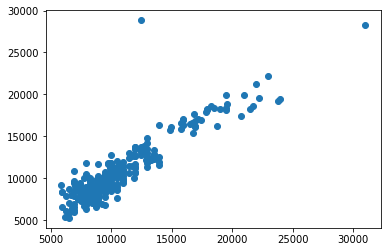

In [ ]:
# Plot y_val vs y_pred
plt.scatter(y_val, y_pred)

## Cross Validation

In [ ]:
# standardizing the predictors
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)

In [ ]:
# crossvalidation 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_std, y, cv = 10, scoring = 'neg_root_mean_squared_error')
print(scores *-1)
print('Mean RMSE', scores.mean()*-1)

[2983.53206484 2110.51596497 1479.02843564 1178.96155907 1368.99039768
  930.0674086  1480.92650667 1206.81113436  969.72813761 1171.56621041]
Mean RMSE 1488.0127819844984


### Decision Tree Model

In [ ]:
# importing decision tree
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state =0, max_depth= 4)
model.fit(X_train_std, y_train)

DecisionTreeRegressor(max_depth=4, random_state=0)

In [ ]:
# Export the decision tree
from sklearn.tree import export_graphviz
export_graphviz(model, out_file = 'tree.dot', impurity = True, filled = True, rounded = True, feature_names= X_train.columns[0 : 8],
                class_names = ['0', '1'])

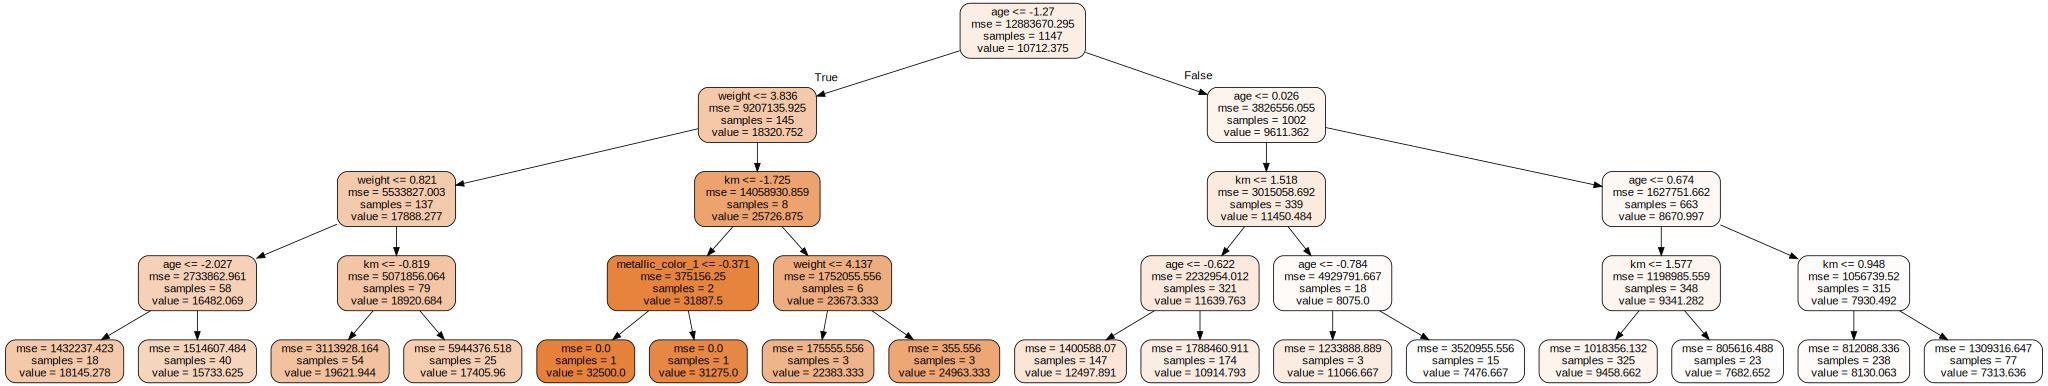

In [ ]:
# plot the tree
import  graphviz 
with open('tree.dot') as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

In [ ]:
# predicting car price
y_pred = model.predict(x_val_std)

In [ ]:
# mean square error
mean_squared_error(y_val, y_pred)

1617892.2623019142

In [ ]:
# RMSE
mean_squared_error(y_val, y_pred)**0.5

1271.963939072926

In [ ]:
# R square
r2_score(y_val, y_pred)

0.8862749168819333

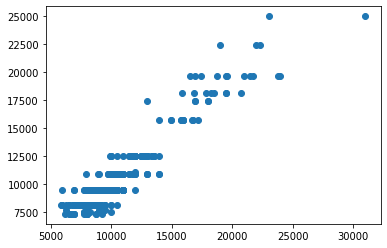

In [ ]:
# Plot y_val vs y_pred
plt.scatter(y_val, y_pred)

### Crossvalidation Decision Trees

In [ ]:
 #crossvalidation 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_std, y, cv = 10, scoring = 'neg_root_mean_squared_error')
print(scores *-1)

[3981.72914585 2181.62226516 1686.05535872 1768.82996859 1440.1567769
 1081.68952948  935.76484814 1330.80182793 1020.13977593 1076.39367869]


In [ ]:
# crossvalidation 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_std, y, cv = 10, scoring = 'neg_root_mean_squared_error')
print(scores *-1)

[3981.72914585 2181.62226516 1686.05535872 1768.82996859 1440.1567769
 1081.68952948  935.76484814 1330.80182793 1020.13977593 1076.39367869]


In [ ]:
# importing decision tree
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state =0)
model.fit(X_train_std, y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
# Export the decision tree
from sklearn.tree import export_graphviz
export_graphviz(model, out_file = 'tree.dot', impurity = True, filled = True, rounded = True, feature_names= X_train.columns[0 : 8],
                class_names = ['0', '1'])

In [ ]:
# plot the tree
import  graphviz 
with open('tree.dot') as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

Output hidden; open in https://colab.research.google.com to view.

## KNN MODEL

In [ ]:
# Importing KNN
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
# Training model
model = KNeighborsRegressor(n_neighbors = 5)
model.fit(X_train_std, y_train)

KNeighborsRegressor()

In [ ]:
# predicting the target
y_pred = model.predict(x_val_std)

In [ ]:
# Mean Squared error
mean_squared_error(y_val, y_pred)

2047660.1464808362

In [ ]:
# RMSE
mean_squared_error(y_val, y_pred) **0.5

1430.9647607404022

In [ ]:
# R square
r2_score(y_val, y_pred)

0.8560656195828756

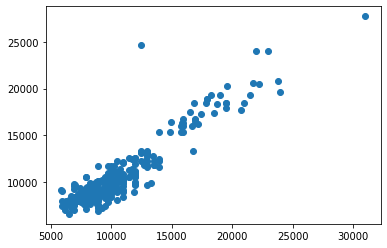

In [ ]:
# Scatterplot of y_pred vs y_val
plt.scatter(y_val, y_pred)

## Crossvalidation Decision Trees


In [ ]:
#crossvalidation 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_std, y, cv = 10, scoring = 'neg_root_mean_squared_error')
print(scores *-1)
print('Mean RMSE', scores.mean()*-1)

[5045.83868546 2576.89075012 1424.90892516 1610.87503395 1753.10950316
 1119.30900687 1443.98494006 1446.22154702 1007.17131771 1285.84898895]
Mean RMSE 1871.415869847154


## Random Forest

In [ ]:
# importing random forest
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 1000, random_state = 123, max_features= 3, max_depth= 5)
model.fit(X_train, y_train)


RandomForestRegressor(max_depth=5, max_features=3, n_estimators=1000,
                      random_state=123)

In [ ]:
# predicting 
y_pred = model.predict(x_val)

In [ ]:
# MSE
mean_squared_error(y_val, y_pred)

1346288.349635584

In [ ]:
# RMSE
mean_squared_error(y_val, y_pred) ** 0.5

1160.296664493863

In [ ]:
# R Square
r2_score(y_val, y_pred)

0.905366532722424

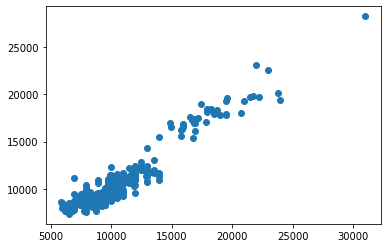

In [ ]:
# scatterplot
plt.scatter(y_val, y_pred)

In [ ]:
# importing random forest
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 1000, random_state = 123, max_features= 'sqrt', max_depth= 5)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, max_features='sqrt', n_estimators=1000,
                      random_state=123)

## XG BOOST

In [ ]:
# importing XG boost
import xgboost as xgb

In [ ]:
# train model
model = xgb.XGBRegressor(objective='reg:squarederror', random_state = 123, learning_rate = 0.15, 
                         n_estimators=1000, max_depth = 5)
model.fit(X_train, y_train) 

XGBRegressor(learning_rate=0.15, max_depth=5, n_estimators=1000,
             objective='reg:squarederror', random_state=123)

In [ ]:
# predicting 
y_pred = model.predict(x_val)

In [ ]:
# MSE
mean_squared_error(y_val, y_pred)

1322391.6032462942

In [ ]:
# RMSE
mean_squared_error(y_val, y_pred) ** 0.5

1149.952870010895

In [ ]:
# R Square
r2_score(y_val, y_pred)

0.9070462857768744

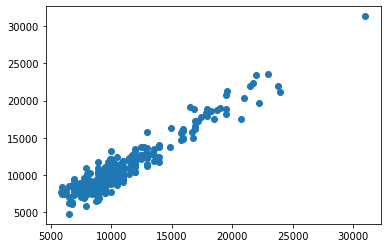

In [ ]:
# scatterplot
plt.scatter(y_val, y_pred)

In [ ]:
# importing XG boost
import xgboost as xgb

In [ ]:
# train model
model = xgb.XGBRegressor(objective='reg:squarederror', random_state = 123, learning_rate = 0.15, 
                         n_estimators=2000, max_depth = 5)
model.fit(X_train, y_train) 

XGBRegressor(learning_rate=0.15, max_depth=5, n_estimators=2000,
             objective='reg:squarederror', random_state=123)

In [ ]:
# predicting 
y_pred = model.predict(x_val)

In [ ]:
# MSE
mean_squared_error(y_val, y_pred)

1336279.7883672016

In [ ]:
# RMSE
mean_squared_error(y_val, y_pred) ** 0.5

1155.9756867543545

In [ ]:
# R Square
r2_score(y_val, y_pred)

0.906070055749674

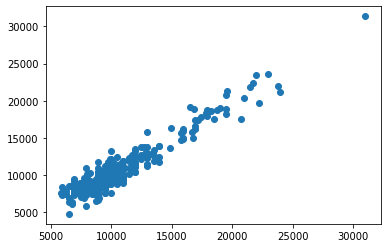

In [ ]:
# scatterplot
plt.scatter(y_val, y_pred)

## Auto-Sklearn

In [ ]:
# Importing sklearn
import autosklearn
from autosklearn.regression import AutoSklearnRegressor

In [ ]:
import joblib
# define model
TIME_BUDGET = 60*2
model = AutoSklearnRegressor(
    time_left_for_this_task= TIME_BUDGET,
    metric = autosklearn.metrics.root_mean_squared_error,
    n_jobs= -1,
    resampling_strategy='cv',
    resampling_strategy_arguments= {'folds': 5}
)

In [ ]:
# train model
model.fit(X_train, y_train)

AutoSklearnRegressor(metric=root_mean_squared_error, n_jobs=-1,
                     per_run_time_limit=24, resampling_strategy='cv',
                     resampling_strategy_arguments={'folds': 5},
                     time_left_for_this_task=120)

In [ ]:
# predicting 
y_pred = model.predict(x_val)

In [ ]:
# MSE
mean_squared_error(y_val, y_pred)

1215021.8567285782

In [ ]:
# RMSE
mean_squared_error(y_val, y_pred) ** 0.5

1102.2802986212619

In [ ]:
# R Square
r2_score(y_val, y_pred)

0.914593533286248

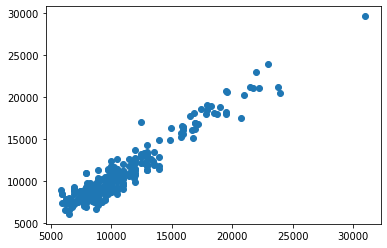

In [ ]:
# scatterplot
plt.scatter(y_val, y_pred)

In [ ]:
# model summary
print(model.sprint_statistics())

auto-sklearn results:
  Dataset name: 4a1e8118-140c-11ed-8102-0242ac1c0002
  Metric: root_mean_squared_error
  Best validation score: 1126.546641
  Number of target algorithm runs: 13
  Number of successful target algorithm runs: 5
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 8
  Number of target algorithms that exceeded the memory limit: 0



In [ ]:
# Leaderboard
print(model.leaderboard())

          rank  ensemble_weight            type         cost   duration
model_id                                                               
2            1             0.50   random_forest  1126.546641  19.544593
8            2             0.30     extra_trees  1137.403791  17.440315
4            3             0.14      libsvm_svr  1267.049432   5.450873
6            4             0.06  ard_regression  1334.488274   4.362906
